**Some quick transformations**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
nfl_df = pd.read_csv('C:\\Users\\miker\\Desktop\\Nfl_Data.csv')
nfl_df.head()

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,Jordan Love,1083,6.7,162,90,55.6,8,6,77.3,49,30.2,12,3,77,10,83
1,Jimmy Garoppolo,1079,7.3,147,100,68.0,7,8,82.6,54,36.7,9,0,32,7,52
2,Kenny Pickett,1027,6.5,159,95,59.8,5,4,78.8,39,24.5,14,3,72,14,106
3,Bryce Young,967,5.3,182,115,63.2,6,4,78.7,56,30.8,7,0,30,16,128
4,Daniel Jones,884,5.8,151,104,68.9,2,6,71.7,41,27.2,9,1,58,28,150


In [20]:
nfl_df.set_index('Player', inplace = True)
nfl_df.rename(columns={'Rate':'Pass_Rating'}, inplace = True)
nfl_df.tail()

## We changed the column name of 'Rate' to perhaps make things easier for casual fans. ##
## We also set our player to be our index. ##

,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Pass_Rating,1st,1st%,20+,40+,Lng,Sck,SckY,Yds/Sck
Player,,,,,,,,,,,,,,,,
Justin Fields,1201,7.4,162,100,61.7,11,6,91.6,55,34.0,21,2,58,24,143,5.96
Geno Smith,1172,7.2,164,111,67.7,5,3,90.8,56,34.2,14,0,36,11,93,8.45
Ryan Tannehill,1128,7.1,158,98,62.0,2,6,71.9,49,31.0,17,4,70,19,135,7.11
Zach Wilson,1097,6.0,182,110,60.4,4,5,73.4,50,27.5,13,1,68,19,130,6.84
Baker Mayfield,1088,6.7,162,106,65.4,7,3,91.3,54,33.3,15,2,70,5,25,5.00


In [21]:
## Let's add a column for yards lost per sack taken. ##
## Because some of these values are 0 for sacks taken, and I didn't feel like .fillna was appropriate, I added a small value to sack total that gets rounded out. ##

nfl_df['Yds/Sck'] = nfl_df.apply(lambda x: round(x['SckY'] / (x['Sck'] +.0001),2), axis=1)
nfl_df.head()

,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Pass_Rating,1st,1st%,20+,40+,Lng,Sck,SckY,Yds/Sck
Player,,,,,,,,,,,,,,,,
Jordan Love,1083,6.7,162,90,55.6,8,6,77.3,49,30.2,12,3,77,10,83,8.30
Jimmy Garoppolo,1079,7.3,147,100,68.0,7,8,82.6,54,36.7,9,0,32,7,52,7.43
Kenny Pickett,1027,6.5,159,95,59.8,5,4,78.8,39,24.5,14,3,72,14,106,7.57
Bryce Young,967,5.3,182,115,63.2,6,4,78.7,56,30.8,7,0,30,16,128,8.00
Daniel Jones,884,5.8,151,104,68.9,2,6,71.7,41,27.2,9,1,58,28,150,5.36


In [40]:
nfl_df['Cmp'].describe()

## There are 2 outliers that are going to give us issues. Let's look closer. ##

count     50.000000
mean      83.420000
std       57.242089
min        1.000000
25%       18.250000
50%      102.000000
75%      129.750000
max      163.000000
Name: Cmp, dtype: float64

In [41]:
nfl_df['Cmp'].nsmallest(2)

## These two players are not quarterbacks. They each have a long completion due to a trick play, let's drop them. ##

Player
Keenan Allen    1
Drake London    1
Name: Cmp, dtype: int64

In [45]:
nfl_df.drop(nfl_df['Cmp'].nsmallest(2).index, inplace = True)
nfl_df['Cmp'].describe()

## The new lowest value of 3 is Mike White, a backup quarterback for the Dolphins. We will keep him in our data. ##

count     46.000000
mean      90.543478
std       54.032380
min        3.000000
25%       34.250000
50%      108.000000
75%      131.500000
max      163.000000
Name: Cmp, dtype: float64

**Distribution plot**

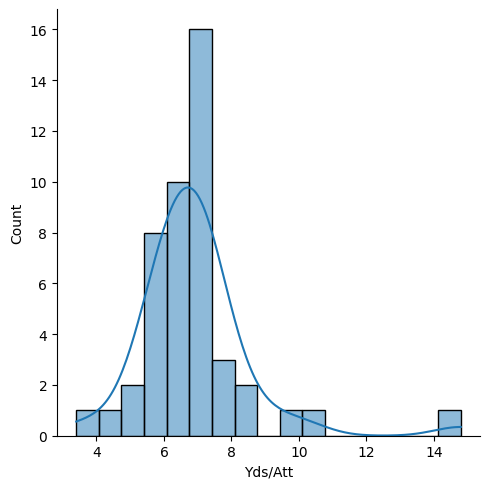

In [47]:
sns.displot(nfl_df['Yds/Att'], kde = True)

## Distribution of yards per attempt with a probablity density function (pdf) ##

**Joint Plot**

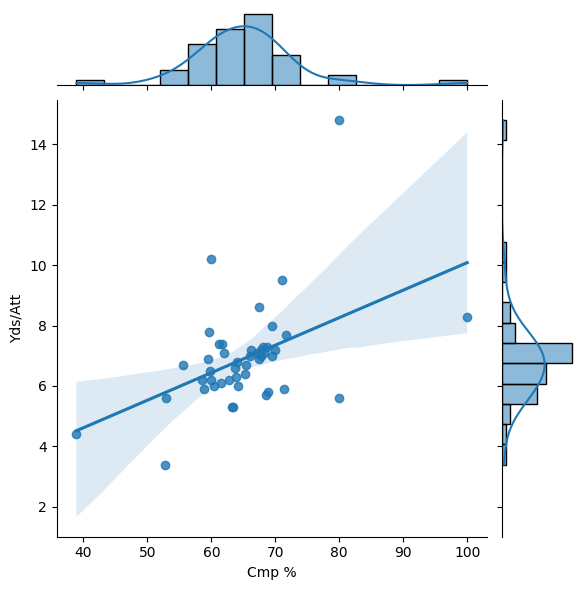

In [53]:
sns.jointplot(x='Cmp %', y='Yds/Att', data=nfl_df, kind='reg')

## Joint regression plot of completion percent on yards/attempt. ##

**Pair Plot**

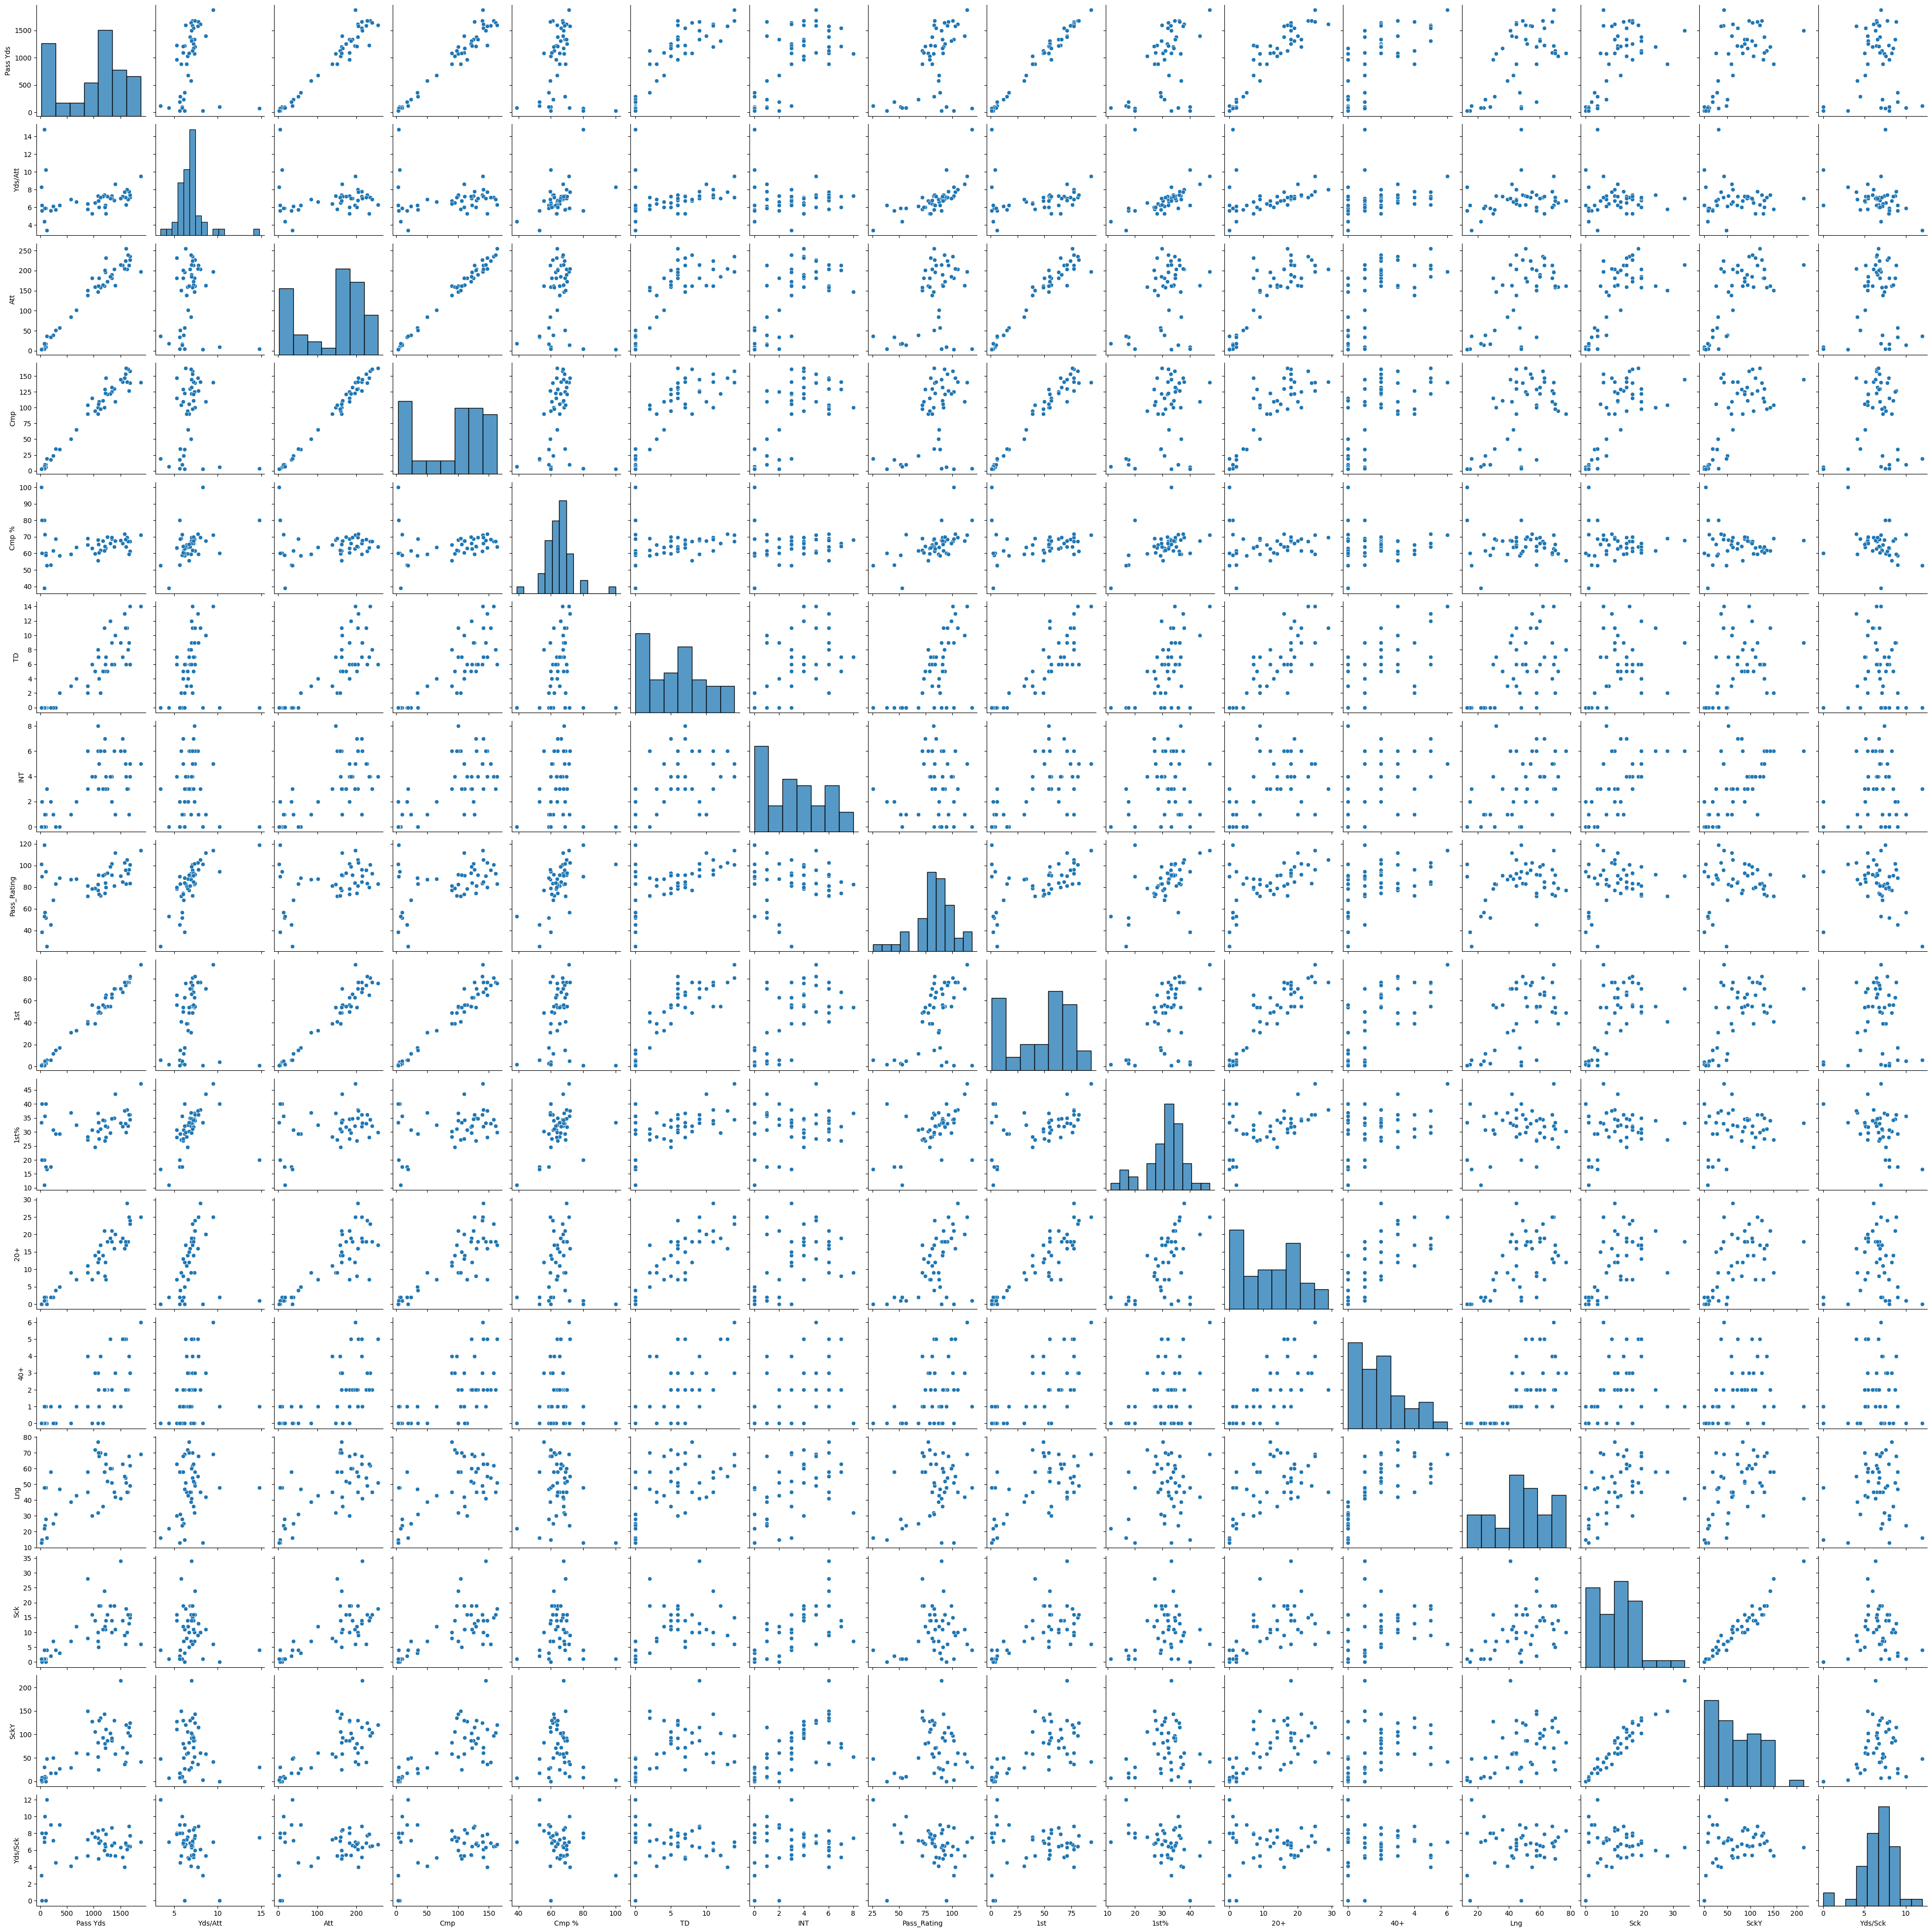

In [56]:
## Using a pairplot, we can see the data in each column as it relates to the other columns. ##

sns.pairplot(nfl_df)